In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10
(train_x,train_y),( test_x, test_y)= cifar10.load_data()

In [3]:
train_x.shape,train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
train_x.min(), train_x.max()

(0, 255)

In [5]:
import numpy as np
ab= np.where(train_y == 0)
ab[0]

array([   29,    30,    35, ..., 49941, 49992, 49994], dtype=int64)

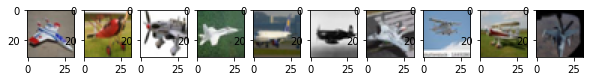

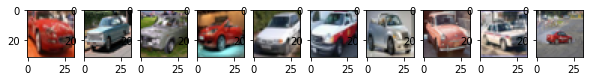

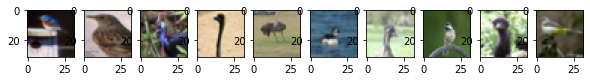

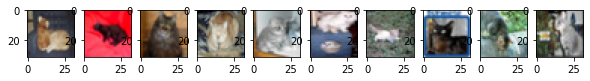

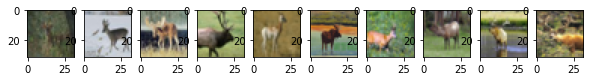

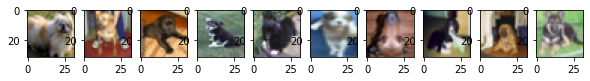

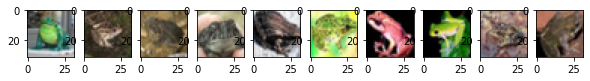

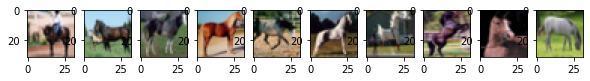

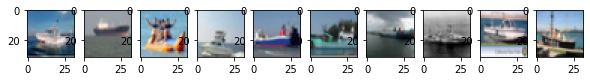

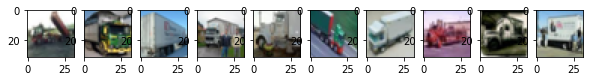

In [6]:
for i in range(0,10):
    ind=np.where(train_y == i)
    samp= train_x[ind[0]]
    plt.figure(figsize=(12,12))
    for j in range(1,11):
        ax=plt.subplot(1,12,j)
        ax.imshow(samp[j], cmap="gray")

In [7]:
# from tensorflow.keras.utils import to_categorical
# train_y_enc, test_y_enc =to_categorical(train_y), to_categorical(test_y)

In [8]:
train_y= train_y/255.0
test_y= test_y/255.0

In [9]:
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding="same" ,activation="relu", input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=(3,3),padding="same",activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))
model.add(Conv2D(64, kernel_size=(3,3),padding="same" ,activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3),padding="same" ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer= Adam(0.01) , loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [11]:
history =model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.0175 - sparse_categorical_accuracy: 0.0999 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1000
